<a href="https://colab.research.google.com/github/chandinig777/Classicmodels-Dashboard-PowerBi/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Salary Prediction Using Machine Learning

In today's competitive business environment, accurately predicting employee salary based on performance and business metrics has become crucial. Organizations rely on such insights for workforce planning, talent retention, and performance evaluations.

- In this project, we aim to build a predictive model that estimates an employee’s Salary based on various features such as:

  - Total Sales

  - Bonus

  - Base Pay

  - Unit Price

  - Volume

  - Months Worked

  -  other important business indicators.

- The goal is to create a robust and interpretable machine learning model that not only achieves high accuracy but also provides insights into the factors affecting salary determination.

Our project harnesses exactly these features—base pay, bonus, total sales, unit price, volume, tenure and low price—to build a transparent, highly accurate salary prediction engine. Ultimately, this tool empowers HR to forecast compensation, spot anomalies, and design data backed incentive plans that reward the right mix of long term commitment and top tier results.

## Objective:
- Predict employee Salary based on business and performance metrics.

 # Techniques Used
- Exploratory Data Analysis (EDA): Understand data distribution and outliers.

- Feature Engineering: Handling multicollinearity, scaling features, selecting top predictors.

- Model Building: Training multiple machine learning models.

- Model Evaluation: Using metrics like R² Score, MSE, MAE.

- Hyperparameter Tuning: Optimizing models with GridSearchCV.

- Model Interpretation: Explaining predictions using SHAP values and Feature Importance plots.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [ ]:
path = "/content/sample_data/HR_data.csv"
df = pd.read_csv(path)
df.head(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [ ]:
df.shape

(5000, 20)

- Shape of the dataset is 5000 rows and 20 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

- By using info() we can see there are objects,floats and integers

In [ ]:
df.duplicated().sum()

np.int64(0)

- No duplicate values in the dataset

# Data Preprocessing

### Checking Null Values

In [ ]:
df.isnull().sum()

,0
Gender,0
Business,0
Dependancies,0
Calls,0
Type,0
Billing,0
Rating,0
Age,0
Salary,0
Base_pay,23


▶  By using isnull() we can check null values

- Base_pay is having 23 null values

- openingbalance is having 1476 null values

- Total_Sales are having 8 null values

## Missing value imputation


In [ ]:
df['Base_pay'] = df['Base_pay'].fillna(df['Base_pay'].median())

In [ ]:
#filling the null values
df[df['Total_Sales'].astype(str).str.strip() == ' ']
df['Total_Sales'] = df['Total_Sales'].replace(r'^\s*$', np.nan, regex=True)
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce')
df['Total_Sales'].fillna(df['Total_Sales'].median(), inplace=True)

In [ ]:
df['openingbalance'].fillna(df['openingbalance'].median(), inplace= True)

Checking again Null values are present or not

In [ ]:
df.isnull().sum()

,0
Gender,0
Business,0
Dependancies,0
Calls,0
Type,0
Billing,0
Rating,0
Age,0
Salary,0
Base_pay,0


- There are No Null Values present

# Encoding the categorical variables
- LabelEncoder
- Manual encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder instance
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Rating'] = le.fit_transform(df['Rating'])
df['Calls'] = le.fit_transform(df['Calls'])
df['Billing'] = le.fit_transform(df['Billing'])
df['Dependancies'] = le.fit_transform(df['Dependancies'])
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
education_map = {
    'High School or less': 0,
    "Intermediate": 1,
    "Graduation": 2,
    'PG': 3
}

# Apply the mapping
df['Education'] = df['Education'].map(education_map)

# Check the results
print(df['Education'].head())

0    0
1    0
2    0
3    0
4    0
Name: Education, dtype: int64


## Checking Outliers
- using IQR (Interquartile Range) for outlier detection

In [ ]:
import numpy as np
import pandas as pd

# Assuming df is your dataset
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop over each numeric column
for col in num_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Feature: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print("-"*40)


Feature: Gender
Number of outliers: 0
----------------------------------------
Feature: Business
Number of outliers: 800
----------------------------------------
Feature: Dependancies
Number of outliers: 0
----------------------------------------
Feature: Calls
Number of outliers: 461
----------------------------------------
Feature: Type
Number of outliers: 0
----------------------------------------
Feature: Billing
Number of outliers: 0
----------------------------------------
Feature: Rating
Number of outliers: 0
----------------------------------------
Feature: Age
Number of outliers: 115
----------------------------------------
Feature: Salary
Number of outliers: 77
----------------------------------------
Feature: Base_pay
Number of outliers: 83
----------------------------------------
Feature: Bonus
Number of outliers: 77
----------------------------------------
Feature: Unit_Price
Number of outliers: 411
----------------------------------------
Feature: Volume
Number of outlier

- In this we can observe Business , call, volume,openingbalance,closing balance,low are having High outliers.
- Total Outlier Count in Dataset: 3796


## Treating Outliers
- Used Winsoriztion Method

In [ ]:
num_cols = ['Business', 'Age', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
            'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months']
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower, lower,
               np.where(df[col] > upper, upper, df[col]))

- As the dataset is having more than 50% data as outliers.so we cannot remove
- Instead of removing outliers, we replace them with a fixed percentile value.
- This method treat outliers by limiting the extreme values to reduce their effect on the model.

In [ ]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(df[num_cols])
# X_test_ = scaler.transform(X_test)

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Convert scaled array back to DataFrame for easier column handling
# X_train_scaled = pd.DataFrame(X_scaled, columns=num_cols)

# # VIF Calculation
# vif_data = pd.DataFrame()
# vif_data['Feature'] = X_train_scaled.columns
# vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# # Display result
# print("VIF After Winsorization & RobustScaler:")
# print(vif_data.sort_values(by='VIF', ascending=False))

NameError: name 'X_scaled' is not defined

##Assigning the Features:

- Independent Features for X variable
- Dependent Feature for Y variable

In [ ]:
X = df[['Total_Sales','Bonus','Unit_Price', 'Months','Volume','low']]
y = df['Salary']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Splitting the Dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

checking the shape of X_train,X_test,y_train,y_test

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((4000, 6), (1000, 6), (4000,), (1000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Check Before and After Scaling the data

Text(0.5, 1.0, 'X_train after scaling')

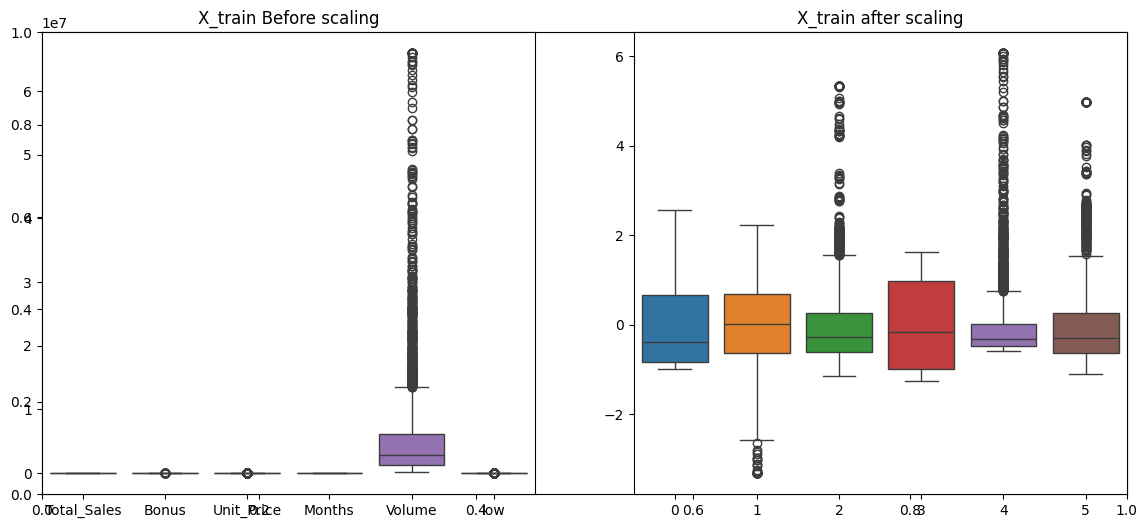

In [ ]:
# boxplots to understand scaler
plt.subplots(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_Scaled)
plt.title('X_train after scaling')

# Linear Regression

In [ ]:
# Initialize Linear Regression model
model = LinearRegression()
model.fit(X_train_Scaled, y_train)

LinearRegression()

In [ ]:
#model.coef_

array([-2.57746593e+03,  2.57772285e+04,  1.32017193e+02,  2.30819965e+02,
       -2.76413575e-01,  1.62544517e+03])

In [ ]:
#model.intercept_

np.float64(99976.47751519101)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_predLR =model.predict(X_test_scaled)
# Evaluate
mse_LR = mean_squared_error(y_test, y_predLR)
mae_LR = mean_absolute_error(y_test, y_predLR)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, y_predLR)

print(" XGBoost Results:")
print(f"MAE: {mae_LR}")
print(f"RMSE: {rmse_LR}")
print(f"R2 Score: {r2_LR}")


 XGBoost Results:
MAE: 359.05518775600024
RMSE: 1174.0391005273846
R2 Score: 0.9980119563316614


# RidgeCV

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_predRCV = ridgecv.predict(X_test)
# Evaluate
mse_RCV = mean_squared_error(y_test, y_predRCV)
mae_RCV = mean_absolute_error(y_test, y_predRCV)
rmse_RCV = np.sqrt(mse_RCV)
r2_RCV = r2_score(y_test, y_predRCV)

print(" XGBoost Results:")
print(f"MAE: {mae_RCV}")
print(f"RMSE: {rmse_RCV}")
print(f"R2 Score: {r2_RCV}")


# plt.scatter(y_test,y_predRCV)
# print('MSE_RCV:',mean_squared_error(y_test, y_predRCV))
# print('MAE_RCV:',mean_absolute_error(y_test,y_predRCV))
# print('RMSE_RCV:',np.sqrt(mean_squared_error(y_test, y_predRCV)))
# r2_rcv = r2_score(y_test, y_predRCV)
# print('R2 SCORE:',r2_rcv)

 XGBoost Results:
MAE: 633.340153702876
RMSE: 1518.3855548028794
R2 Score: 0.996674745234863


# LassoCV

 XGBoost Results:
MAE: 19620.861842902537
RMSE: 25348.561703793195
R2 Score: 0.07323965624937079


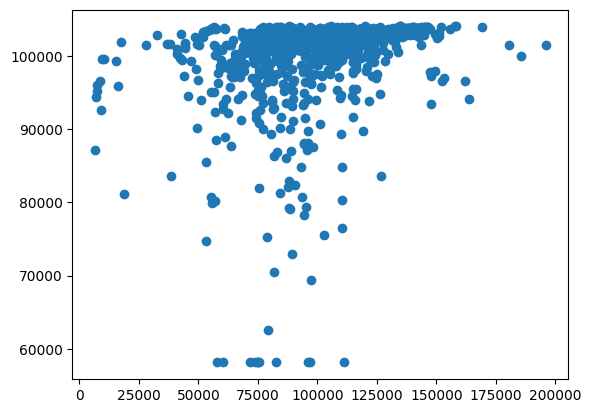

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)
y_predLCV = lassocv.predict(X_test)
plt.scatter(y_test,y_predLCV)
# Evaluate
mse_LCV = mean_squared_error(y_test, y_predLCV)
mae_LCV = mean_absolute_error(y_test, y_predLCV)
rmse_LCV = np.sqrt(mse_LCV)
r2_LCV = r2_score(y_test, y_predLCV)

print(" XGBoost Results:")
print(f"MAE: {mae_LCV}")
print(f"RMSE: {rmse_LCV}")
print(f"R2 Score: {r2_LCV}")


# RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_Scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🔹 Random Forest Results:")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")


🔹 Random Forest Results:
MSE: 375041.64818330936
MAE: 92.67859865084041
RMSE: 612.40644035094
R2 Score: 0.9994590709614234


# XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

# Instantiate the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(" XGBoost Results:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2 Score: {r2_xgb}")


 XGBoost Results:
MAE: 359.05518775600024
RMSE: 1174.0391005273846
R2 Score: 0.9980119563316614


In [ ]:
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'Random Forest', 'XGBoost']
r2_scores = [r2_LR, r2_RCV, r2_LCV, r2_rf, r2_xgb]
mse_scores = [mse_rf, mse_RCV, mse_LCV, mse_rf, mse_xgb]
mae_scores = [mae_rf, mae_RCV, mae_LCV, mae_rf, mae_xgb]
rmse_scores = [rmse_rf, rmse_RCV, rmse_LCV, rmse_rf, mse_xgb]

import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE' : mse_scores
})

print(results_df.sort_values(by=['R2 Score', 'MSE'], ascending=[False, True]))



               Model  R2 Score           MSE          RMSE           MAE
3      Random Forest  0.999459  3.750416e+05  6.124064e+02  3.750416e+05
0  Linear Regression  0.998012  3.750416e+05  6.124064e+02  3.750416e+05
4            XGBoost  0.998012  1.378368e+06  1.378368e+06  1.378368e+06
1            RidgeCV  0.996675  2.305495e+06  1.518386e+03  2.305495e+06
2            LassoCV  0.073240  6.425496e+08  2.534856e+04  6.425496e+08


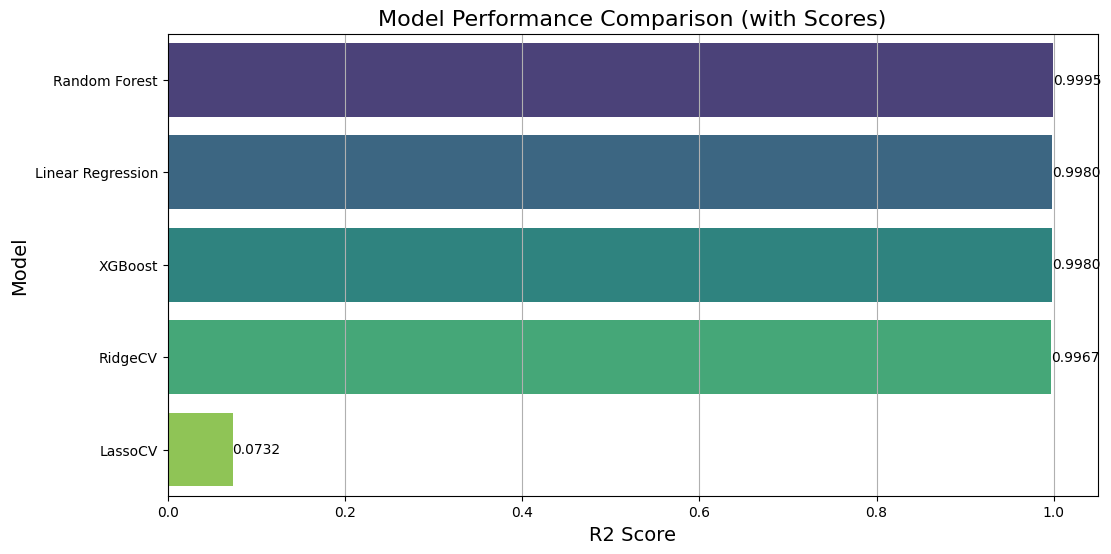

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='R2 Score', y='Model', data=results_df_sorted, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', label_type='edge', fontsize=10)

plt.title('Model Performance Comparison (with Scores)', fontsize=16)
plt.xlabel('R2 Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.grid(axis='x')
plt.show()


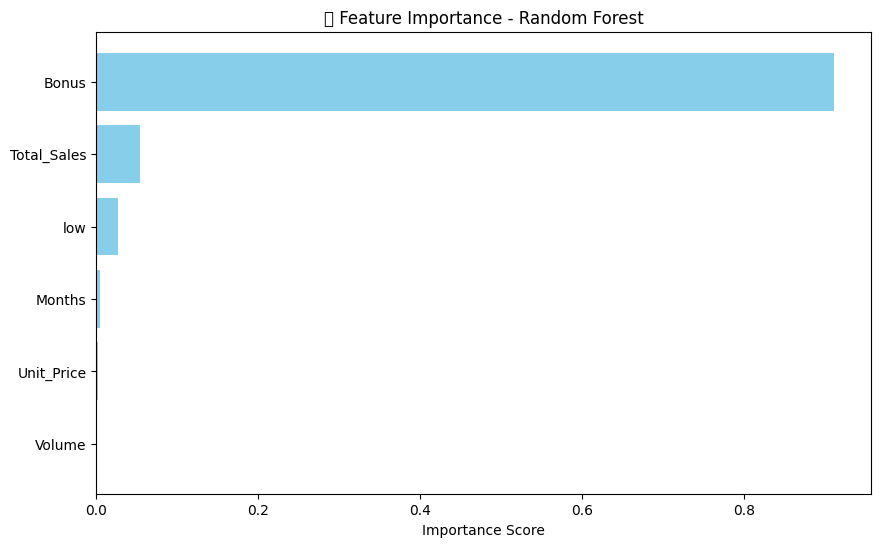

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you trained random_forest_model on X_train
importances = rf_model.feature_importances_  # Changed random_forest_model to rf_model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() # Important features on top
plt.title('🔎 Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

# Hyperparameter Tuning
- In the above Results Randomforest regression got high Accuracy
- so we need to tune the parameters to get better results

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)

# Best model
best_rf_model = random_search.best_estimator_

print("✅ Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
best_rf = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

# Train
best_rf.fit(X_train_Scaled, y_train)

# Predict
y_train_pred = best_rf.predict(X_train_Scaled)
y_test_pred = best_rf.predict(X_test_scaled)


- After getting the best params i did again fit the training model

In [ ]:
# Train R²
r2_train = r2_score(y_train, y_train_pred)

# Test R²
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R2: {r2_train:.4f}")
print(f"Testing R2: {r2_test:.4f}")



Training R2: 0.9996
Testing R2: 0.9994


- Got the Accuracy 99% on both train and test data

# Feature Importances

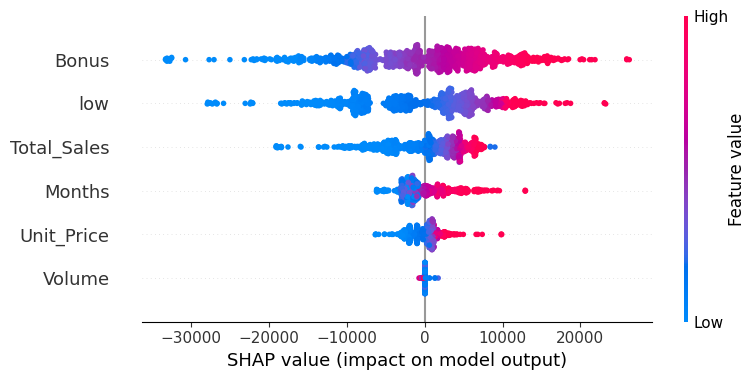

In [ ]:
!pip install shap
import shap

# Create explainer
explainer = shap.TreeExplainer(best_rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


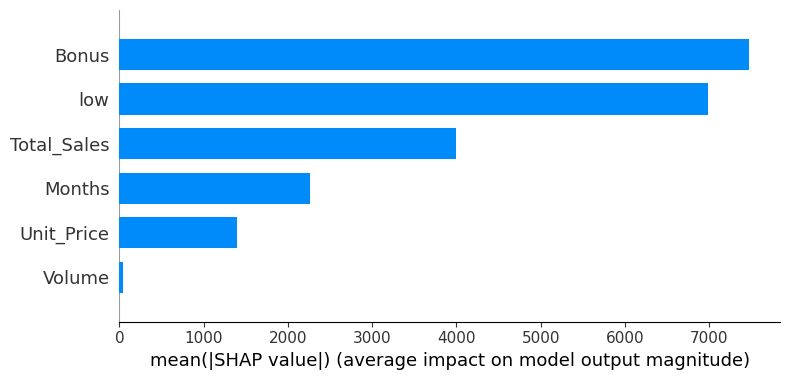

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


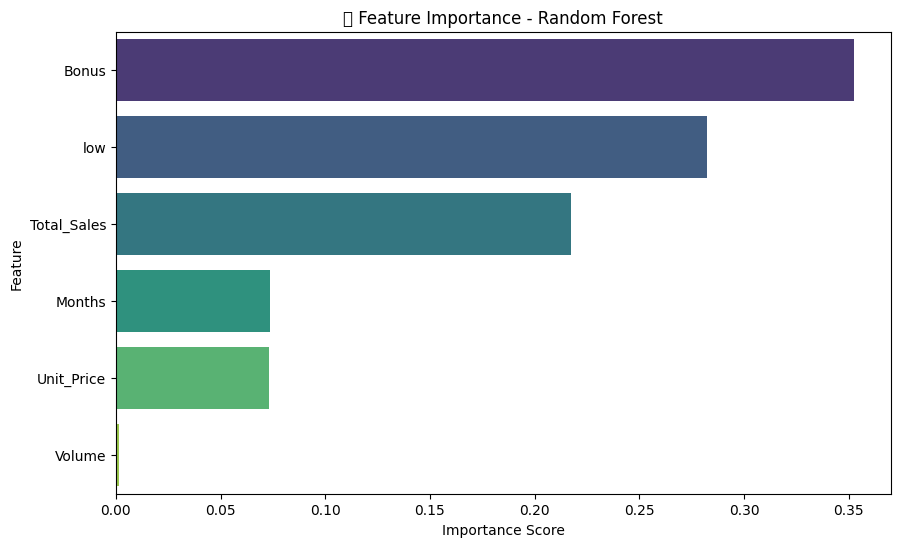

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature Importances
feature_importances = best_rf_model.feature_importances_

# Create DataFrame for better plotting
feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('🔎 Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


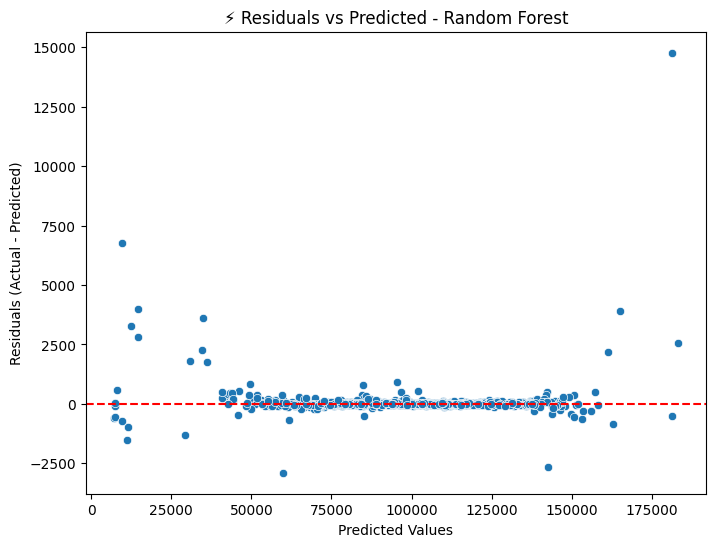

In [ ]:
# Predict on Test set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate Residuals
residuals_rf = y_test - y_pred_rf

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title('⚡ Residuals vs Predicted - Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


## Residuals Distribution

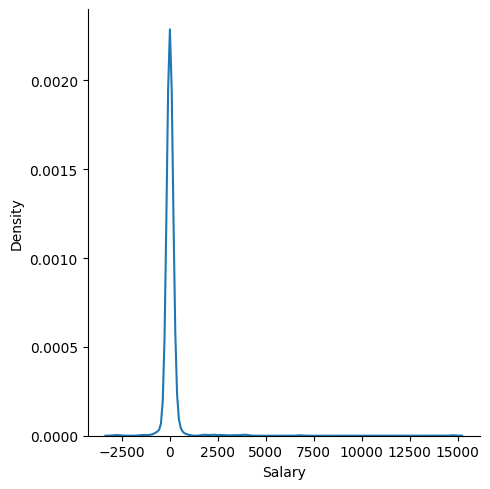

In [ ]:
sns.displot(residuals_rf,kind='kde')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define model
model = LinearRegression()

# Perform 5-Fold Cross Validation
scores = cross_val_score(model, X, y, cv=13, scoring='r2')

# Print results
print("Cross Validation R2 Scores:", scores)
print("Average R2 Score:", np.mean(scores))


Cross Validation R2 Scores: [0.96989578 0.97272677 0.80129739 0.78012124 0.93701213 0.84791382
 0.88215655 0.89778165 0.98738415 0.91950762 0.62608949 0.87584997
 0.56243973]
Average R2 Score: 0.8507827902670771


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso

# 2) Define a CV splitter
kf = KFold(n_splits=16, shuffle=True, random_state=42)

# 3) Ridge Regression CV
ridge = Ridge(alpha=1.0, random_state=42)       # tune alpha as needed
ridge_r2 = cross_val_score(ridge, X, y, cv=kf, scoring='r2')
ridge_mse = -cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(ridge_mse)

print("Ridge CV R² scores:    ", np.round(ridge_r2, 4))

print("Ridge CV mean R²:      ", np.round(ridge_r2.mean(), 4))
print('________________________________________')
print("Ridge CV RMSE scores:  ", np.round(ridge_rmse, 2))
print("Ridge CV mean RMSE:    ", np.round(ridge_rmse.mean(), 2))


Ridge CV R² scores:     [0.9979 0.9968 0.995  0.994  0.9987 0.9984 0.9981 0.9988 0.9959 0.9984
 0.9979 0.9981 0.9984 0.998  0.9983 0.9982]
Ridge CV mean R²:       0.9976
________________________________________
Ridge CV RMSE scores:   [1180.72 1520.36 1855.5  2020.95  862.19  938.9  1122.6   796.86 1555.85
 1018.66 1214.   1190.32 1062.91 1065.34  940.4  1085.09]
Ridge CV mean RMSE:     1214.42


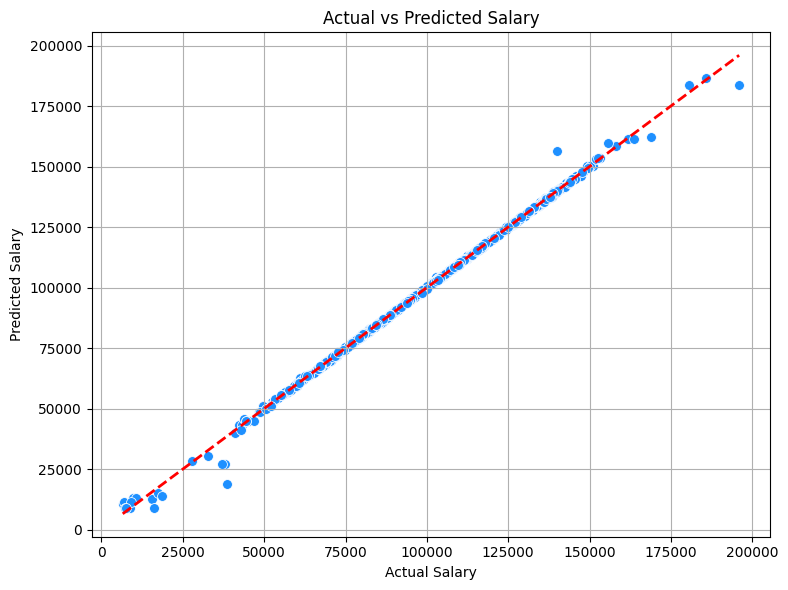

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='dodgerblue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
residuals = y_test - y_pred
residuals

,Salary
1501,-140.782959
2586,-357.617281
2653,-388.351384
1055,-451.036038
705,93.098959
...,...
4711,-983.350547
2313,-280.096644
3214,-158.871896
2732,-362.026863


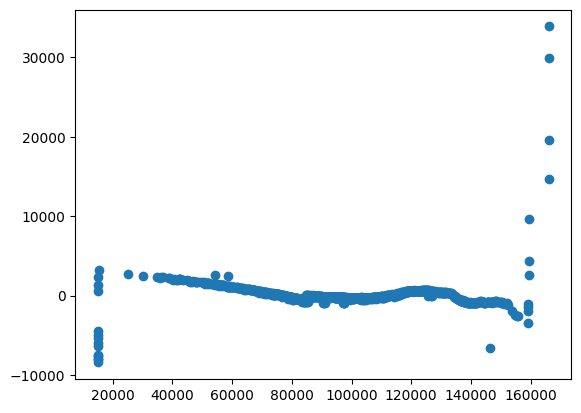

In [ ]:
plt.scatter(y_pred,residuals)

🧠 Statistical Techniques:
•	Univariate analysis:

o	For continuous variables: mean, median, mode, standard deviation, skewness, kurtosis

o	For categorical variables: frequency distribution


#ASSUMPTIONS

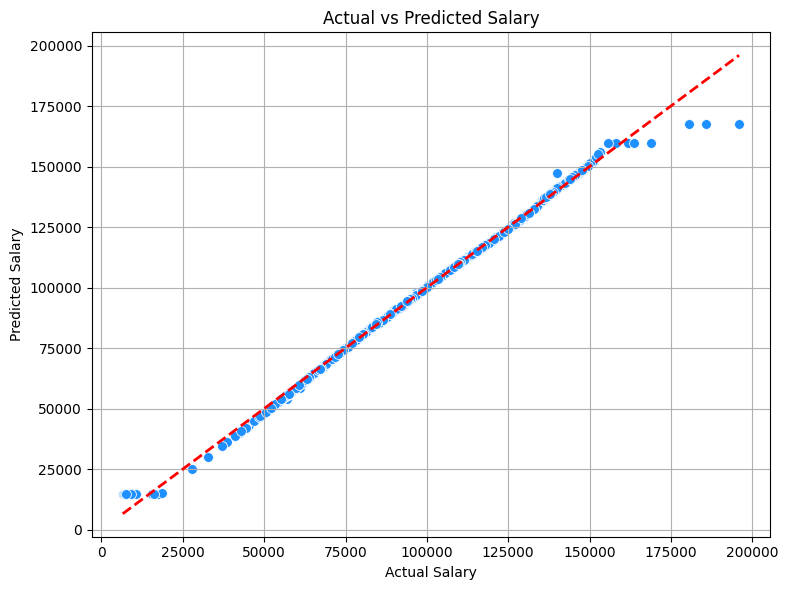

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='dodgerblue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'y_test')

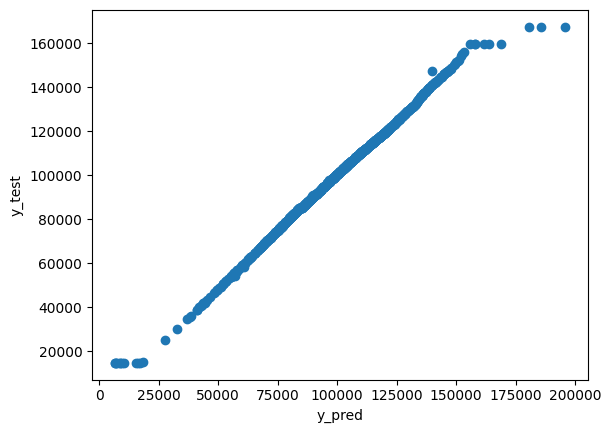

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [ ]:
residuals = y_test - y_pred
residuals

,Salary
1501,-140.782959
2586,-357.617281
2653,-388.351384
1055,-451.036038
705,93.098959
...,...
4711,-983.350547
2313,-280.096644
3214,-158.871896
2732,-362.026863


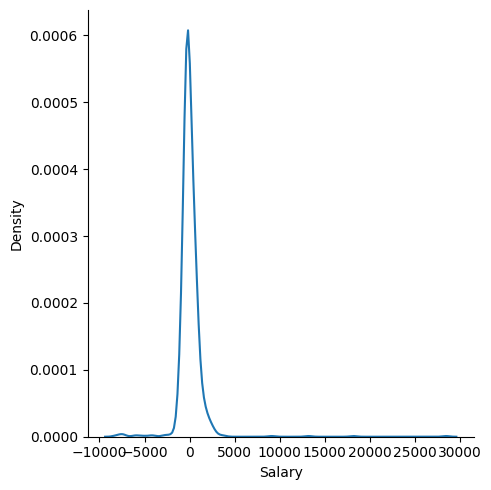

In [ ]:
sns.displot(residuals,kind='kde')

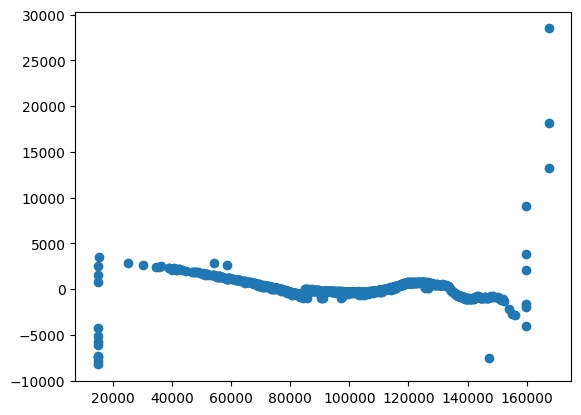

In [ ]:
plt.scatter(y_pred,residuals)

In [ ]:
# from scipy.stats import skew, kurtosis

# # Select your numerical features
# numerical_features = ['Business', 'Age', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
#                       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months']

# # Create a summary DataFrame
# summary = pd.DataFrame(index=numerical_features, columns=['Mean', 'Median', 'Mode',
#                                                            'Std Dev', 'Skewness', 'Kurtosis'])

# for col in numerical_features:
#     summary.loc[col, 'Mean'] = df[col].mean()
#     summary.loc[col, 'Median'] = df[col].median()
#     summary.loc[col, 'Mode'] = df[col].mode()[0]  # Get the first mode
#     summary.loc[col, 'Std Dev'] = df[col].std()
#     summary.loc[col, 'Skewness'] = skew(df[col].dropna())
#     summary.loc[col, 'Kurtosis'] = kurtosis(df[col].dropna())

# # Optional: Format the result nicely
# summary = summary.round(2)
# print(summary)


In [ ]:
import pickle

# Suppose 'best_rf_model' is your trained RandomForest model
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)


In [ ]:
import pickle

with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
st.title('Salary Prediction App')

2025-04-18 05:55:31.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:55:32.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# 4. User inputs
Total_Sales = st.number_input('Enter Total Sales')
Bonus = st.number_input('Enter Bonus')
Unit_Price = st.number_input('Enter Unit Price')
Months = st.number_input('Enter Months')
Volume = st.number_input('Enter Volume')
Low = st.number_input('Enter Low')

# 5. Predict
if st.button('Predict Salary'):
    input_data = np.array([[Total_Sales, Bonus, Unit_Price, Months, Volume, Low]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Salary: ₹{prediction[0]:.2f}")

2025-04-18 05:56:26.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56:26.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56:26.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56:26.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56:26.963 Session state does not function when running a script without `streamlit run`
2025-04-18 05:56:26.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56:26.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56:26.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:56

In [ ]:
streamlit run app.py


SyntaxError: invalid syntax (<ipython-input-108-718866ff34b9>, line 1)

In [ ]:
!pip install streamlit

# 2. app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

import os # Import os module

# ... (rest of your imports and code) ...

# Check if model file exists
if not os.path.exists('best_rf_model.pkl'):
    st.warning("Model file not found. Please train and save the model first.")
else:
    # 3. Load your trained model if it exists
    model = pickle.load(open('best_rf_model.pkl', 'rb'))

    st.title('Salary Prediction App')

    # ... (rest of your Streamlit app code) ...

# 3. Load your trained model
model = pickle.load(open('best_rf_model.pkl', 'rb'))

st.title('Salary Prediction App')

# 4. User inputs
Total_Sales = st.number_input('Enter Total Sales')
Bonus = st.number_input('Enter Bonus')
Unit_Price = st.number_input('Enter Unit Price')
Months = st.number_input('Enter Months')
Volume = st.number_input('Enter Volume')
Low = st.number_input('Enter Low')

# 5. Predict
if st.button('Predict Salary'):
    input_data = np.array([[Total_Sales, Bonus, Unit_Price, Months, Volume, Low]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Salary: ₹{prediction[0]:.2f}")
# 2. app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# 3. Load your trained model
model = pickle.load(open('best_rf_model.pkl', 'rb'))

st.title('Salary Prediction App')

# 4. User inputs
Total_Sales = st.number_input('Enter Total Sales')
Bonus = st.number_input('Enter Bonus')
Unit_Price = st.number_input('Enter Unit Price')
Months = st.number_input('Enter Months')
Volume = st.number_input('Enter Volume')
Low = st.number_input('Enter Low')

# 5. Predict
if st.button('Predict Salary'):
    input_data = np.array([[Total_Sales, Bonus, Unit_Price, Months, Volume, Low]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Salary: ₹{prediction[0]:.2f}")


2025-04-18 05:52:42.102 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 05:52:42.251 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-18 05:52:42.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


FileNotFoundError: [Errno 2] No such file or directory: 'best_rf_model.pkl'